## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94773248/94765736 [==============================] - 155s 2us/step


In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [8]:

# view the structure of the model
model.summary()


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [12]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [13]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 12s 6s/step - loss: 3.8466 - accuracy: 0.3750 - val_loss: 9.9353 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 10s 5s/step - loss: 13.2773 - accuracy: 0.2969 - val_loss: 5.6289 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 9s 5s/step - loss: 6.6637 - accuracy: 0.3906 - val_loss: 5.1862 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 10s 5s/step - loss: 4.6749 - accuracy: 0.4062 - val_loss: 7.1528 - val_accuracy: 0.1552
Epoch 5/50
2/2 [==============================] - 9s 5s/step - loss: 3.5084 - accuracy: 0.4219 - val_loss: 1.4614 - val_accuracy: 0.5172
Epoch 6/50
2/2 [==============================] - 9s 4s/step - loss: 2.4544 - accuracy: 0.4844 - val_loss: 2.5654 - val_accuracy: 0.5690
Epoch 7/50
2/2 [==============================] - 9s 4s/step - loss: 3.7700 - accuracy: 0.5000 - v

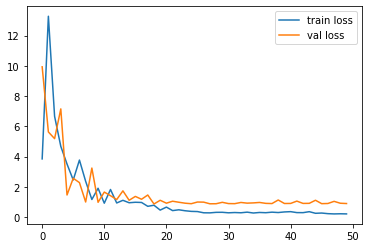

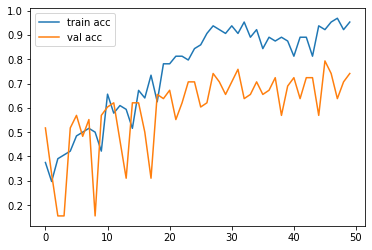

<Figure size 432x288 with 0 Axes>

In [14]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [16]:

y_pred = model.predict(test_set)


In [17]:
y_pred

array([[3.00278850e-02, 8.80992293e-01, 8.89797807e-02],
       [4.79611277e-04, 9.89499867e-01, 1.00205112e-02],
       [2.33207066e-02, 9.39689696e-01, 3.69895995e-02],
       [2.01808736e-02, 7.43547618e-01, 2.36271545e-01],
       [9.67992425e-01, 2.64528301e-02, 5.55470120e-03],
       [1.96660892e-03, 9.93420184e-01, 4.61325934e-03],
       [1.02139767e-02, 9.89360094e-01, 4.26058308e-04],
       [4.81401496e-02, 1.26346666e-02, 9.39225197e-01],
       [1.61090791e-01, 3.67682315e-02, 8.02140951e-01],
       [6.82577372e-01, 2.25884914e-01, 9.15376395e-02],
       [4.75185439e-02, 8.74869168e-01, 7.76123330e-02],
       [3.60923052e-01, 4.33676362e-01, 2.05400586e-01],
       [3.11790314e-02, 6.26277447e-01, 3.42543602e-01],
       [9.30657983e-03, 6.15758955e-01, 3.74934494e-01],
       [1.35632396e-01, 7.81674087e-01, 8.26935023e-02],
       [1.21016884e-02, 9.42456245e-01, 4.54420336e-02],
       [1.13523537e-02, 9.00132179e-01, 8.85155275e-02],
       [4.57052402e-02, 9.48527

In [18]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [19]:
y_pred

array([1, 1, 1, 1, 0, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1,
       2, 0, 1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 2], dtype=int64)

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [21]:
model=load_model('model_resnet50.h5')

In [41]:
img=image.load_img('Datasets/Test/audi/21.jpg',target_size=(224,224))



In [42]:
x=image.img_to_array(img)
x

array([[[190.,  59.,  65.],
        [181.,  55.,  59.],
        [173.,  50.,  53.],
        ...,
        [129., 139., 141.],
        [191., 201., 203.],
        [156., 166., 168.]],

       [[160.,  37.,  40.],
        [156.,  37.,  39.],
        [152.,  38.,  38.],
        ...,
        [124., 134., 136.],
        [122., 132., 134.],
        [ 78.,  88.,  90.]],

       [[160.,  37.,  40.],
        [156.,  37.,  39.],
        [152.,  38.,  38.],
        ...,
        [124., 134., 136.],
        [122., 132., 134.],
        [ 78.,  88.,  90.]],

       ...,

       [[ 89., 100., 102.],
        [ 85.,  96.,  98.],
        [ 75.,  86.,  88.],
        ...,
        [ 92.,  95., 100.],
        [ 78.,  83.,  87.],
        [112., 117., 121.]],

       [[ 89., 100., 102.],
        [ 85.,  96.,  98.],
        [ 75.,  86.,  88.],
        ...,
        [ 92.,  95., 100.],
        [ 78.,  83.,  87.],
        [112., 117., 121.]],

       [[ 89., 101., 101.],
        [ 85.,  97.,  97.],
        [ 75.,  

In [43]:
x.shape

(224, 224, 3)

In [44]:
x=x/255

In [45]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [46]:
model.predict(img_data)

array([[0.16035187, 0.02292008, 0.81672806]], dtype=float32)

In [47]:
a=np.argmax(model.predict(img_data), axis=1)

In [48]:
a==1

array([False])

In [49]:
a

array([2], dtype=int64)